In [ ]:
D:\Usuario\Desktop\data.csv

In [1]:
#importamos las librerias necesarias para trabajar en el primer TP

import xgboost as xgb  #Libreria de algoriitmo de boosting, sive para hacer la prediccion
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones

In [282]:
housedata = pd.read_csv("D:\Usuario\Documents\casas home.csv", nrows = 100000) #Es el Dataset de Datos Historicos con el que entrenaremos el Modelo.


In [283]:
[columna for columna in housedata.columns if housedata[columna].nunique() == 1]
housedata.drop(columns = ['statezip','date','street','waterfront','view','country'], inplace=True)


In [284]:
housedata[column].isnull().sum()

0

In [285]:
housedata.isnull().sum().any()

False

In [286]:
housedata.columns

Index([u'price', u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot',
       u'floors', u'condition', u'sqft_above', u'sqft_basement', u'yr_built',
       u'yr_renovated', u'city'],
      dtype='object')

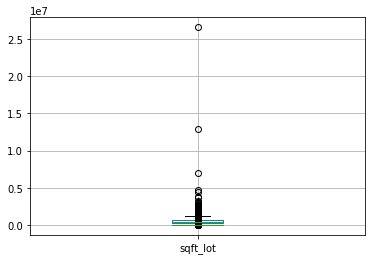

In [287]:
housedata.boxplot(['price'])
housedata.boxplot(['sqft_basement'])
housedata.boxplot(['sqft_lot'])

In [288]:
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.75
housedata.loc[housedata['sqft_lot']>housedata['sqft_lot'].quantile(0.75),'sqft_lot'] = housedata['sqft_lot'].quantile(0.75)
housedata.loc[housedata['price']>housedata['price'].quantile(0.75),'price'] = housedata['price'].quantile(0.75)
housedata.loc[housedata['sqft_lot']>housedata['sqft_lot'].quantile(0.75),'sqft_lot'] = housedata['sqft_lot'].quantile(0.75)

In [290]:
housedata1 = pd.get_dummies(housedata['city'], prefix='city')
housedatafinal = pd.concat([housedata, housedata1], axis=1)


In [291]:
housedatafinal.drop(columns = ['city'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.000000,3.0,1.50,1340,7912.0000,1.5,3,1340,0,1955,...,0,0,1,0,0,0,0,0,0,0
1,654962.500000,5.0,2.50,3650,9050.0000,2.0,5,3370,280,1921,...,0,1,0,0,0,0,0,0,0,0
2,342000.000000,3.0,2.00,1930,11000.3125,1.0,4,1930,0,1966,...,0,0,0,0,0,0,0,0,0,0
3,420000.000000,3.0,2.25,2000,8030.0000,1.0,4,1000,1000,1963,...,0,0,0,0,0,0,0,0,0,0
4,550000.000000,4.0,2.50,1940,10500.0000,1.0,4,1140,800,1976,...,0,0,0,0,0,0,0,0,0,0
5,490000.000000,2.0,1.00,880,6380.0000,1.0,3,880,0,1938,...,0,1,0,0,0,0,0,0,0,0
6,335000.000000,2.0,2.00,1350,2560.0000,1.0,3,1350,0,1976,...,0,0,0,0,0,0,0,0,0,0
7,482000.000000,4.0,2.50,2710,11000.3125,2.0,3,2710,0,1989,...,0,0,0,0,0,0,0,0,0,0
8,452500.000000,3.0,2.50,2430,11000.3125,1.0,4,1570,860,1985,...,0,0,0,0,0,0,0,0,0,0
9,640000.000000,4.0,2.00,1520,6200.0000,1.5,3,1520,0,1945,...,0,1,0,0,0,0,0,0,0,0


In [292]:
housedatafinal['total'] = housedatafinal['price'] >  416904.166667
housedatafinal['pricefinal'] = (housedatafinal['total']==0).astype(int)

In [293]:
housedatafinal.drop(columns = ['city','total'], inplace=True)

In [294]:
housedatafinal

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,pricefinal
0,313000.000000,3.0,1.50,1340,7912.0000,1.5,3,1340,0,1955,...,0,1,0,0,0,0,0,0,0,1
1,654962.500000,5.0,2.50,3650,9050.0000,2.0,5,3370,280,1921,...,1,0,0,0,0,0,0,0,0,0
2,342000.000000,3.0,2.00,1930,11000.3125,1.0,4,1930,0,1966,...,0,0,0,0,0,0,0,0,0,1
3,420000.000000,3.0,2.25,2000,8030.0000,1.0,4,1000,1000,1963,...,0,0,0,0,0,0,0,0,0,0
4,550000.000000,4.0,2.50,1940,10500.0000,1.0,4,1140,800,1976,...,0,0,0,0,0,0,0,0,0,0
5,490000.000000,2.0,1.00,880,6380.0000,1.0,3,880,0,1938,...,1,0,0,0,0,0,0,0,0,0
6,335000.000000,2.0,2.00,1350,2560.0000,1.0,3,1350,0,1976,...,0,0,0,0,0,0,0,0,0,1
7,482000.000000,4.0,2.50,2710,11000.3125,2.0,3,2710,0,1989,...,0,0,0,0,0,0,0,0,0,0
8,452500.000000,3.0,2.50,2430,11000.3125,1.0,4,1570,860,1985,...,0,0,0,0,0,0,0,0,0,0
9,640000.000000,4.0,2.00,1520,6200.0000,1.5,3,1520,0,1945,...,1,0,0,0,0,0,0,0,0,0


In [295]:
y = housedatafinal['pricefinal']

In [311]:
columns= [col for col in housedatafinal.columns if col not in ['pricefinal','price']]

In [312]:
from sklearn.model_selection import train_test_split 

In [313]:
x = housedatafinal[columns]

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [315]:
def train(x_train,y_train):

    xgb_model = xgb.XGBClassifier()

    print("Comienza entrenamiento del modelo XGBoost")

    xgb_model.fit(x_train, y_train)

    print("Entrenamiento finalizado\n")

    print("Haciendo las predicciones\n\n")

    XGB_preds = xgb_model.predict(x_test)
    print(classification_report(y_test, XGB_preds))
    print(confusion_matrix(y_test, XGB_preds))
    return xgb_model

In [316]:
def predict(data_to_predict, xgb_model):
  
    print("\n\n-------------------------")
    print("Ingreso a la funcion de prediccion\n")

    XGB_preds = xgb_model.predict_proba(x)
    
    return XGB_preds

In [317]:
modelo = train(x_train, y_train)

Comienza entrenamiento del modelo XGBoost
Entrenamiento finalizado

Haciendo las predicciones


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       665
           1       0.86      0.75      0.80       485

   micro avg       0.84      0.84      0.84      1150
   macro avg       0.85      0.83      0.83      1150
weighted avg       0.84      0.84      0.84      1150

[[606  59]
 [123 362]]
